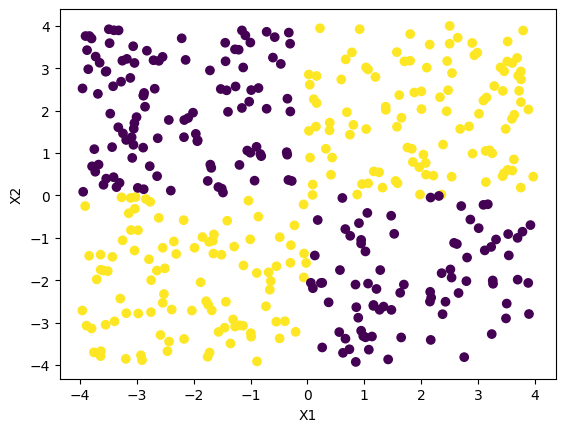

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
np.random.seed(42)
torch.manual_seed(42)
X = np.random.uniform(low=-4, high=4, size=(400,2))
y = np.bitwise_xor(np.sign(X[:,0]).astype(int),np.sign(X[:,1]).astype(int))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 10.7 MB/s eta 0:00:00


In [ ]:
import torchmetrics
import torch.nn.functional as F

In [ ]:
y = np.where(y == -2, 1, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(42)
class relu_mlp(nn.Module):
  def __init__(self):
    super(relu_mlp, self).__init__()
    self.fc1 = nn.Linear(2,4)
    self.fc2 = nn.Linear(4,4)
    self.fc3 = nn.Linear(4,1)
  
  def forward (self,x):
    x = nn.functional.relu(self.fc1(x))
    x = nn.functional.relu(self.fc2(x))
    x = self.fc3(x)
    return x

relu_model = relu_mlp()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(relu_model.parameters(), lr=0.042)

num_epochs = 2001
for e in range(num_epochs):
  y_pred_train = relu_model(torch.from_numpy(X_train.astype('float32'))).squeeze()
  loss = criterion(y_pred_train, torch.from_numpy(y_train.astype('float32'))) # loss is a tensor which stores the current value of train loss
  y_pred_test = relu_model(torch.from_numpy(X_test.astype('float32'))).squeeze()

  y_train_pred_labels = torch.round(nn.functional.sigmoid(y_pred_train))
  train_correct = torch.eq(torch.from_numpy(y_train.astype('float32')), y_train_pred_labels).sum().item()
  train_accuracy = train_correct/len(torch.from_numpy(y_train.astype('float32')))

  y_test_pred_labels = torch.round(nn.functional.sigmoid(y_pred_test))
  test_correct = torch.eq(torch.from_numpy(y_test.astype('float32')), y_test_pred_labels).sum().item()
  test_accuracy = test_correct/len(torch.from_numpy(y_test.astype('float32')))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 100 == 0:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
  if e == num_epochs-1:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
          

Epoch [0/2001], Loss: 800.1635, train_accuracy: 0.5071428571428571, test_accuracy: 0.48333333333333334
Epoch [100/2001], Loss: 787.2691, train_accuracy: 0.625, test_accuracy: 0.6166666666666667
Epoch [200/2001], Loss: 781.9667, train_accuracy: 0.625, test_accuracy: 0.6583333333333333
Epoch [300/2001], Loss: 779.4734, train_accuracy: 0.6321428571428571, test_accuracy: 0.6583333333333333
Epoch [400/2001], Loss: 779.3788, train_accuracy: 0.625, test_accuracy: 0.6416666666666667
Epoch [500/2001], Loss: 781.0515, train_accuracy: 0.6285714285714286, test_accuracy: 0.6416666666666667
Epoch [600/2001], Loss: 780.7134, train_accuracy: 0.6571428571428571, test_accuracy: 0.6916666666666667
Epoch [700/2001], Loss: 778.6695, train_accuracy: 0.6285714285714286, test_accuracy: 0.6583333333333333
Epoch [800/2001], Loss: 779.5305, train_accuracy: 0.6678571428571428, test_accuracy: 0.6666666666666666
Epoch [900/2001], Loss: 778.0099, train_accuracy: 0.6035714285714285, test_accuracy: 0.6
Epoch [1000/200

In [ ]:
from torch.autograd import Variable


def plot_decision_boundary(dataset, labels, model,title, steps=1000, color_map='Paired'):
    color_map = plt.get_cmap(color_map)
    # Define region of interest by data limits
    xmin, xmax = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
    ymin, ymax = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    dataset = torch.from_numpy(dataset.astype('float32'))
    labels = torch.from_numpy(labels.astype('float32'))
    model.eval()
    labels_predicted = (torch.sigmoid(model(Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()))))
    #print(labels_predicted)
    # Plot decision boundary in region of interest
    labels_predicted = [0 if value <= 0.5 else 1 for value in labels_predicted.detach().numpy()]
    z = np.array(labels_predicted).reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=color_map, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels_predicted = model(dataset)
    ax.scatter(dataset[:, 0], dataset[:, 1], c=labels.reshape(labels.size()[0]), cmap=color_map, lw=0)
    plt.title(title)
    plt.show()
    return fig, ax

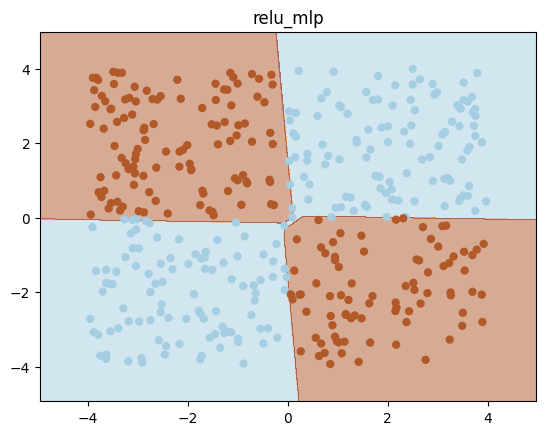

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'relu_mlp'}>)

In [ ]:
plot_decision_boundary(X,y,relu_model,'relu_mlp')

In [ ]:
relu_model.fc1.weight

Parameter containing:
tensor([[ 0.0581,  2.7691],
        [-1.6199,  1.6946],
        [-2.5925, -0.1740],
        [-1.2721,  1.3563]], requires_grad=True)

In [ ]:
class siren_mlp (nn.Module):
  def __init__(self, omega):
    super(siren_mlp, self).__init__()
    self.fc1 = nn.Linear(2,4)
    nn.init.uniform_(self.fc1.weight, -1/2,1/2)
    self.fc2 = nn.Linear(4,4)
    nn.init.uniform_(self.fc2.weight, -np.sqrt(6/4)/omega, np.sqrt(6/4)/omega)
    self.fc3 = nn.Linear(4,1)
    nn.init.uniform_(self.fc3.weight, -np.sqrt(6/4)/omega, np.sqrt(6/4)/omega)

  def forward (self, x):
    x = torch.sin(self.fc1(x))
    x = torch.sin(self.fc2(x))
    x = self.fc3(x)
    return x


siren_model = siren_mlp(omega = 30)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(siren_model.parameters(), lr=1e-2)

num_epochs = 1001
for e in range(num_epochs):
  y_pred_train = siren_model(torch.from_numpy(X_train.astype('float32'))).squeeze()
  loss = criterion(y_pred_train, torch.from_numpy(y_train.astype('float32'))) # loss is a tensor which stores the current value of train loss
  y_pred_test = siren_model(torch.from_numpy(X_test.astype('float32'))).squeeze()

  y_train_pred_labels = torch.round(nn.functional.sigmoid(y_pred_train))
  train_correct = torch.eq(torch.from_numpy(y_train.astype('float32')), y_train_pred_labels).sum().item()
  train_accuracy = train_correct/len(torch.from_numpy(y_train.astype('float32')))

  y_test_pred_labels = torch.round(nn.functional.sigmoid(y_pred_test))
  test_correct = torch.eq(torch.from_numpy(y_test.astype('float32')), y_test_pred_labels).sum().item()
  test_accuracy = test_correct/len(torch.from_numpy(y_test.astype('float32')))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 100 == 0:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
  if e == num_epochs-1:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss


Epoch [0/1001], Loss: 777.6434, train_accuracy: 0.5071428571428571, test_accuracy: 0.5333333333333333
Epoch [100/1001], Loss: 697.1968, train_accuracy: 0.8714285714285714, test_accuracy: 0.8666666666666667
Epoch [200/1001], Loss: 693.4388, train_accuracy: 0.8607142857142858, test_accuracy: 0.8416666666666667
Epoch [300/1001], Loss: 688.7270, train_accuracy: 0.9642857142857143, test_accuracy: 0.9333333333333333
Epoch [400/1001], Loss: 686.1201, train_accuracy: 0.95, test_accuracy: 0.925
Epoch [500/1001], Loss: 685.6306, train_accuracy: 0.9392857142857143, test_accuracy: 0.925
Epoch [600/1001], Loss: 685.3743, train_accuracy: 0.9285714285714286, test_accuracy: 0.9166666666666666
Epoch [700/1001], Loss: 685.1286, train_accuracy: 0.9285714285714286, test_accuracy: 0.9166666666666666
Epoch [800/1001], Loss: 684.9445, train_accuracy: 0.925, test_accuracy: 0.9166666666666666
Epoch [900/1001], Loss: 684.8566, train_accuracy: 0.925, test_accuracy: 0.9166666666666666
Epoch [1000/1001], Loss: 684

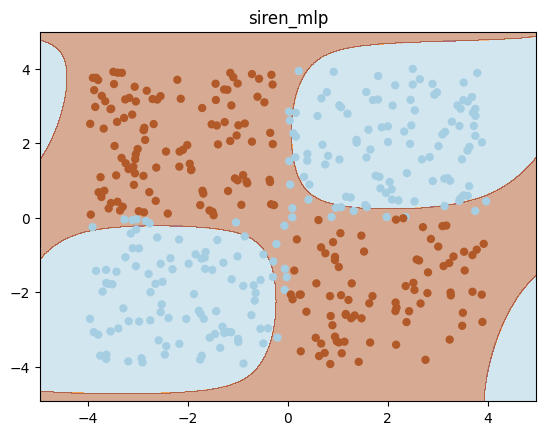

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'siren_mlp'}>)

In [ ]:
plot_decision_boundary(X,y,siren_model,'siren_mlp')

In [ ]:
"""Customizable siren (with any number of hidden layers and neurons in those layers)
import torch.nn as nn

# Define the PyTorch model class
class MyModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_sizes):
        super().__init__()
        
        # Add the input layer
        self.layers = nn.ModuleList([nn.Linear(input_size, hidden_sizes[0])])
        
        # Add the hidden layers
        for i in range(len(hidden_sizes) - 1):
            self.layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        
        # Add the output layer
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
    def forward(self, x):
        # Apply the layers sequentially
        for layer in self.layers[:-1]:
            x = nn.functional.relu(layer(x))
        x = self.layers[-1](x)
        return x

# Create an instance of the model
model = MyModel(input_size=10, output_size=5, hidden_sizes=[20, 30, 40])

# Print the model
print(model)
"""

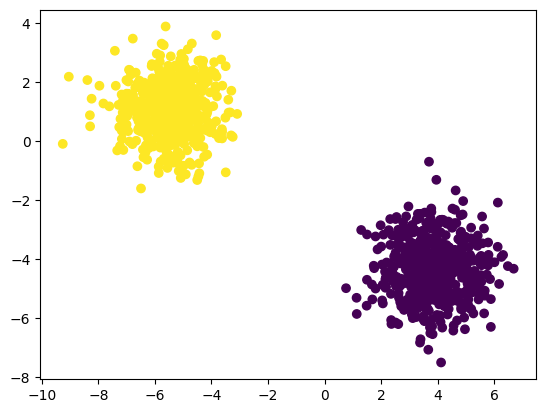

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs



# Generate a Gaussian dataset with two centers
X, y = make_blobs(n_samples=1000, centers=2, random_state=123)

# Plot the dataset
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
relu_model_gaussian = relu_mlp()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(relu_model_gaussian.parameters(), lr=0.1)

num_epochs = 2001
for e in range(num_epochs):
  y_pred_train = relu_model_gaussian(torch.from_numpy(X_train.astype('float32'))).squeeze()
  loss = criterion(y_pred_train, torch.from_numpy(y_train.astype('float32'))) # loss is a tensor which stores the current value of train loss
  y_pred_test = relu_model_gaussian(torch.from_numpy(X_test.astype('float32'))).squeeze()

  y_train_pred_labels = torch.round(nn.functional.sigmoid(y_pred_train))
  train_correct = torch.eq(torch.from_numpy(y_train.astype('float32')), y_train_pred_labels).sum().item()
  train_accuracy = train_correct/len(torch.from_numpy(y_train.astype('float32')))

  y_test_pred_labels = torch.round(nn.functional.sigmoid(y_pred_test))
  test_correct = torch.eq(torch.from_numpy(y_test.astype('float32')), y_test_pred_labels).sum().item()
  test_accuracy = test_correct/len(torch.from_numpy(y_test.astype('float32')))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 100 == 0:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
  if e == num_epochs-1:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
          

Epoch [0/2001], Loss: 2203.6145, train_accuracy: 0.4828571428571429, test_accuracy: 0.54
Epoch [100/2001], Loss: 1968.1898, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [200/2001], Loss: 1968.1895, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [300/2001], Loss: 1968.1896, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [400/2001], Loss: 1968.1897, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [500/2001], Loss: 1968.1897, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [600/2001], Loss: 1968.1897, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [700/2001], Loss: 1968.1896, train_accuracy: 0.9742857142857143, test_accuracy: 1.0
Epoch [800/2001], Loss: 1968.1895, train_accuracy: 0.9414285714285714, test_accuracy: 0.9733333333333334
Epoch [900/2001], Loss: 1968.1897, train_accuracy: 0.9485714285714286, test_accuracy: 0.9733333333333334
Epoch [1000/2001], Loss: 1968.1892, train_accuracy: 0.9628571428571429, test_accuracy: 0.9966666666666667
Epoch [1100/2001], Loss: 1968.1895, train_accuracy: 0.9

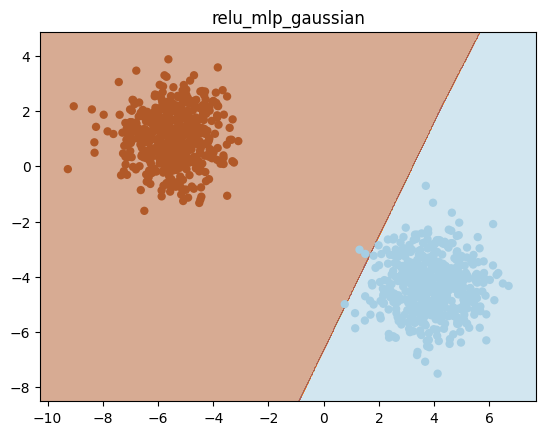

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'relu_mlp_gaussian'}>)

In [ ]:
plot_decision_boundary(X,y,relu_model_gaussian,'relu_mlp_gaussian')

In [ ]:
siren_model_gaussian = siren_mlp(omega = 30)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(siren_model_gaussian.parameters(), lr=1e-2)

num_epochs = 1001
for e in range(num_epochs):
  y_pred_train = siren_model_gaussian(torch.from_numpy(X_train.astype('float32'))).squeeze()
  loss = criterion(y_pred_train, torch.from_numpy(y_train.astype('float32'))) # loss is a tensor which stores the current value of train loss
  y_pred_test = siren_model_gaussian(torch.from_numpy(X_test.astype('float32'))).squeeze()

  y_train_pred_labels = torch.round(nn.functional.sigmoid(y_pred_train))
  train_correct = torch.eq(torch.from_numpy(y_train.astype('float32')), y_train_pred_labels).sum().item()
  train_accuracy = train_correct/len(torch.from_numpy(y_train.astype('float32')))

  y_test_pred_labels = torch.round(nn.functional.sigmoid(y_pred_test))
  test_correct = torch.eq(torch.from_numpy(y_test.astype('float32')), y_test_pred_labels).sum().item()
  test_accuracy = test_correct/len(torch.from_numpy(y_test.astype('float32')))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 100 == 0:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
  if e == num_epochs-1:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss

Epoch [0/1001], Loss: 2214.0588, train_accuracy: 0.4828571428571429, test_accuracy: 0.54
Epoch [100/1001], Loss: 1971.5779, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [200/1001], Loss: 1969.6334, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [300/1001], Loss: 1969.0498, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [400/1001], Loss: 1968.7836, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [500/1001], Loss: 1968.6353, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [600/1001], Loss: 1968.5422, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [700/1001], Loss: 1968.4779, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [800/1001], Loss: 1968.4302, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [900/1001], Loss: 1968.3928, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [1000/1001], Loss: 1968.3622, train_accuracy: 1.0, test_accuracy: 1.0
Epoch [1000/1001], Loss: 1968.3622, train_accuracy: 1.0, test_accuracy: 1.0


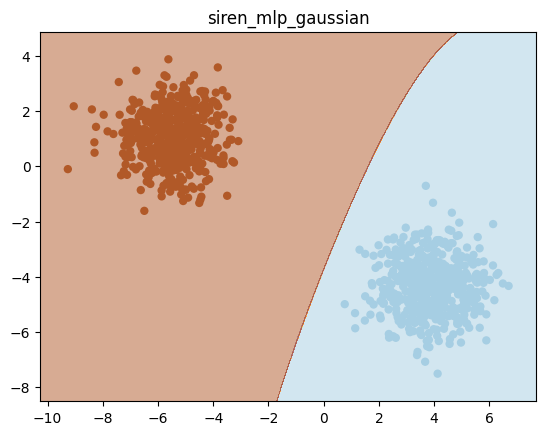

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'siren_mlp_gaussian'}>)

In [ ]:
plot_decision_boundary(X,y,siren_model_gaussian,'siren_mlp_gaussian')

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
grid_size = 1000

X = np.linspace(-3,3,grid_size)
y = np.linspace(-3,3,grid_size)

def twospirals(n_points, noise=.5):
    n = np.sqrt(np.random.rand(n_points,1)) * 720 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), np.hstack((np.zeros(n_points),np.ones(n_points))))

In [ ]:
### Hyperparameters
noise = 0.5 # Noise level 
n_samples = 200#Number of sample/class

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

(X,y) = twospirals(n_points=n_samples, noise=noise)

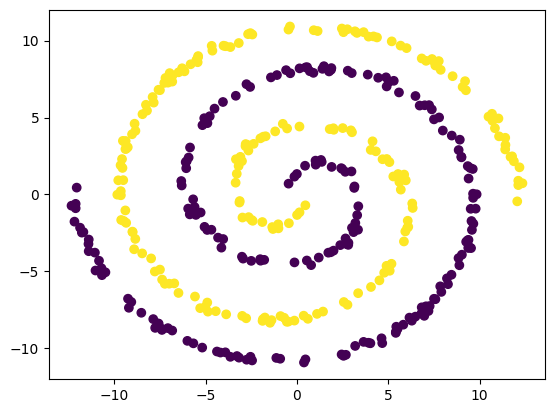

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
relu_model_spiral = relu_mlp()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(relu_model_spiral.parameters(), lr=0.005)

In [ ]:
num_epochs = 10000
for e in range(num_epochs):
  y_pred_train = relu_model_spiral(torch.from_numpy(X_train.astype('float32'))).squeeze()
  loss = criterion(y_pred_train, torch.from_numpy(y_train.astype('float32'))) # loss is a tensor which stores the current value of train loss
  y_pred_test = relu_model_spiral(torch.from_numpy(X_test.astype('float32'))).squeeze()

  y_train_pred_labels = torch.round(nn.functional.sigmoid(y_pred_train))
  train_correct = torch.eq(torch.from_numpy(y_train.astype('float32')), y_train_pred_labels).sum().item()
  train_accuracy = train_correct/len(torch.from_numpy(y_train.astype('float32')))

  y_test_pred_labels = torch.round(nn.functional.sigmoid(y_pred_test))
  test_correct = torch.eq(torch.from_numpy(y_test.astype('float32')), y_test_pred_labels).sum().item()
  test_accuracy = test_correct/len(torch.from_numpy(y_test.astype('float32')))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 100 == 0:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
  if e == num_epochs-1:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
          

Epoch [0/10000], Loss: 740.9595, train_accuracy: 0.8392857142857143, test_accuracy: 0.8083333333333333
Epoch [100/10000], Loss: 740.9438, train_accuracy: 0.8392857142857143, test_accuracy: 0.8083333333333333
Epoch [200/10000], Loss: 740.9565, train_accuracy: 0.8392857142857143, test_accuracy: 0.8
Epoch [300/10000], Loss: 740.9317, train_accuracy: 0.8392857142857143, test_accuracy: 0.8
Epoch [400/10000], Loss: 740.9453, train_accuracy: 0.8392857142857143, test_accuracy: 0.8
Epoch [500/10000], Loss: 740.9249, train_accuracy: 0.8428571428571429, test_accuracy: 0.8083333333333333
Epoch [600/10000], Loss: 740.9294, train_accuracy: 0.8428571428571429, test_accuracy: 0.8083333333333333
Epoch [700/10000], Loss: 740.9203, train_accuracy: 0.8428571428571429, test_accuracy: 0.8083333333333333
Epoch [800/10000], Loss: 739.5353, train_accuracy: 0.8357142857142857, test_accuracy: 0.8083333333333333
Epoch [900/10000], Loss: 739.3265, train_accuracy: 0.8357142857142857, test_accuracy: 0.80833333333333

In [ ]:
import sklearn

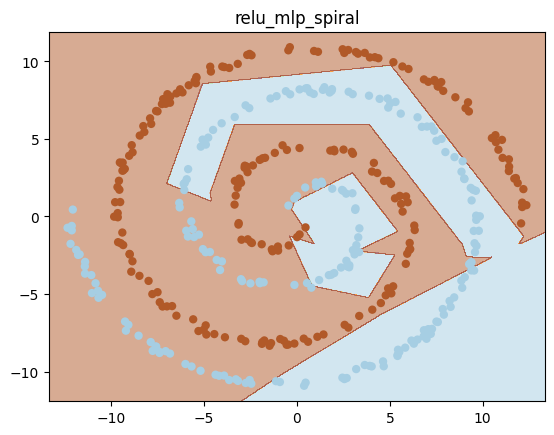

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'relu_mlp_spiral'}>)

In [ ]:
plot_decision_boundary(X,y,relu_model_spiral,'relu_mlp_spiral')

In [ ]:
siren_model_spiral = siren_mlp(omega = 30)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(siren_model_spiral.parameters(), lr=0.03)

In [ ]:
num_epochs = 1000
for e in range(num_epochs):
  y_pred_train = siren_model_spiral(torch.from_numpy(X_train.astype('float32'))).squeeze()
  loss = criterion(y_pred_train, torch.from_numpy(y_train.astype('float32'))) # loss is a tensor which stores the current value of train loss
  y_pred_test = siren_model_spiral(torch.from_numpy(X_test.astype('float32'))).squeeze()

  y_train_pred_labels = torch.round(nn.functional.sigmoid(y_pred_train))
  train_correct = torch.eq(torch.from_numpy(y_train.astype('float32')), y_train_pred_labels).sum().item()
  train_accuracy = train_correct/len(torch.from_numpy(y_train.astype('float32')))

  y_test_pred_labels = torch.round(nn.functional.sigmoid(y_pred_test))
  test_correct = torch.eq(torch.from_numpy(y_test.astype('float32')), y_test_pred_labels).sum().item()
  test_accuracy = test_correct/len(torch.from_numpy(y_test.astype('float32')))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 100 == 0:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
  if e == num_epochs-1:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss

Epoch [0/1000], Loss: 800.1405, train_accuracy: 0.4928571428571429, test_accuracy: 0.5166666666666667
Epoch [100/1000], Loss: 752.3237, train_accuracy: 0.5535714285714286, test_accuracy: 0.5916666666666667
Epoch [200/1000], Loss: 745.1882, train_accuracy: 0.6821428571428572, test_accuracy: 0.6916666666666667
Epoch [300/1000], Loss: 718.4482, train_accuracy: 0.8035714285714286, test_accuracy: 0.875
Epoch [400/1000], Loss: 714.6124, train_accuracy: 0.875, test_accuracy: 0.9
Epoch [500/1000], Loss: 714.1259, train_accuracy: 0.85, test_accuracy: 0.875
Epoch [600/1000], Loss: 713.9681, train_accuracy: 0.8535714285714285, test_accuracy: 0.875
Epoch [700/1000], Loss: 713.8505, train_accuracy: 0.8571428571428571, test_accuracy: 0.875
Epoch [800/1000], Loss: 713.9775, train_accuracy: 0.8571428571428571, test_accuracy: 0.8666666666666667
Epoch [900/1000], Loss: 714.0400, train_accuracy: 0.8678571428571429, test_accuracy: 0.8666666666666667
Epoch [999/1000], Loss: 713.7152, train_accuracy: 0.8678

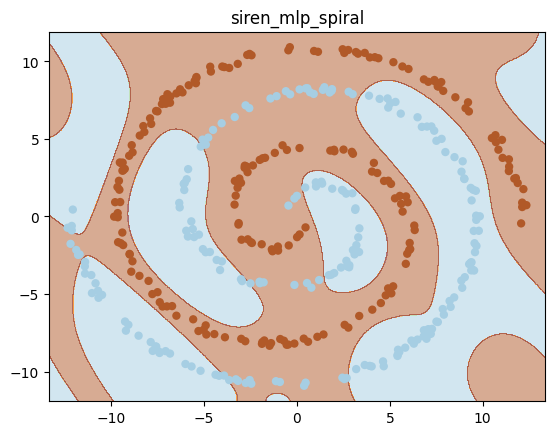

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'siren_mlp_spiral'}>)

In [ ]:
plot_decision_boundary(X,y,siren_model_spiral,'siren_mlp_spiral')

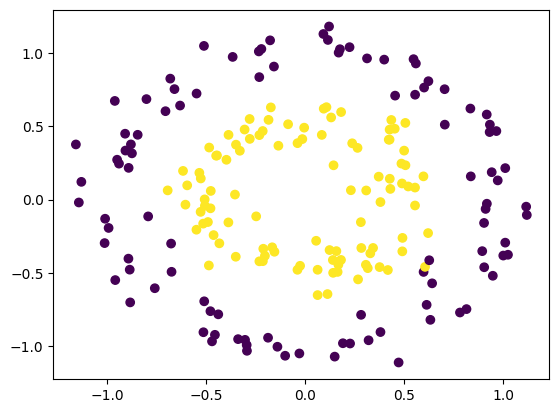

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
relu_model_circle = relu_mlp()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(relu_model_circle.parameters(), lr=0.0115)

num_epochs = 2001
for e in range(num_epochs):
  y_pred_train = relu_model_circle(torch.from_numpy(X_train.astype('float32'))).squeeze()
  loss = criterion(y_pred_train, torch.from_numpy(y_train.astype('float32'))) # loss is a tensor which stores the current value of train loss
  y_pred_test = relu_model_circle(torch.from_numpy(X_test.astype('float32'))).squeeze()

  y_train_pred_labels = torch.round(nn.functional.sigmoid(y_pred_train))
  train_correct = torch.eq(torch.from_numpy(y_train.astype('float32')), y_train_pred_labels).sum().item()
  train_accuracy = train_correct/len(torch.from_numpy(y_train.astype('float32')))

  y_test_pred_labels = torch.round(nn.functional.sigmoid(y_pred_test))
  test_correct = torch.eq(torch.from_numpy(y_test.astype('float32')), y_test_pred_labels).sum().item()
  test_accuracy = test_correct/len(torch.from_numpy(y_test.astype('float32')))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 100 == 0:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
  if e == num_epochs-1:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
          

Epoch [0/2001], Loss: 355.3491, train_accuracy: 0.4857142857142857, test_accuracy: 0.5333333333333333
Epoch [100/2001], Loss: 321.3727, train_accuracy: 0.9785714285714285, test_accuracy: 0.9833333333333333
Epoch [200/2001], Loss: 311.6768, train_accuracy: 1.0, test_accuracy: 0.9666666666666667
Epoch [300/2001], Loss: 308.6651, train_accuracy: 1.0, test_accuracy: 0.9666666666666667
Epoch [400/2001], Loss: 308.1643, train_accuracy: 1.0, test_accuracy: 0.9666666666666667
Epoch [500/2001], Loss: 308.0453, train_accuracy: 1.0, test_accuracy: 0.9666666666666667
Epoch [600/2001], Loss: 307.9990, train_accuracy: 1.0, test_accuracy: 0.9666666666666667
Epoch [700/2001], Loss: 307.9752, train_accuracy: 1.0, test_accuracy: 0.9666666666666667
Epoch [800/2001], Loss: 307.9609, train_accuracy: 1.0, test_accuracy: 0.9666666666666667
Epoch [900/2001], Loss: 307.9518, train_accuracy: 1.0, test_accuracy: 0.9666666666666667
Epoch [1000/2001], Loss: 307.9453, train_accuracy: 1.0, test_accuracy: 0.966666666

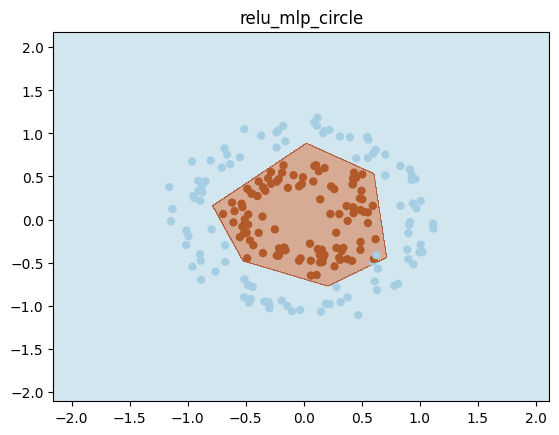

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'relu_mlp_circle'}>)

In [ ]:
plot_decision_boundary(X,y,relu_model_circle,'relu_mlp_circle')

In [ ]:
siren_model_circle = siren_mlp(omega = 30)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(siren_model_circle.parameters(), lr=0.15)

num_epochs = 1001
for e in range(num_epochs):
  y_pred_train = siren_model_circle(torch.from_numpy(X_train.astype('float32'))).squeeze()
  loss = criterion(y_pred_train, torch.from_numpy(y_train.astype('float32'))) # loss is a tensor which stores the current value of train loss
  y_pred_test = siren_model_circle(torch.from_numpy(X_test.astype('float32'))).squeeze()

  y_train_pred_labels = torch.round(nn.functional.sigmoid(y_pred_train))
  train_correct = torch.eq(torch.from_numpy(y_train.astype('float32')), y_train_pred_labels).sum().item()
  train_accuracy = train_correct/len(torch.from_numpy(y_train.astype('float32')))

  y_test_pred_labels = torch.round(nn.functional.sigmoid(y_pred_test))
  test_correct = torch.eq(torch.from_numpy(y_test.astype('float32')), y_test_pred_labels).sum().item()
  test_accuracy = test_correct/len(torch.from_numpy(y_test.astype('float32')))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 100 == 0:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss
  if e == num_epochs-1:
    print(f"Epoch [{e}/{num_epochs}], Loss: {loss.item():.4f}, train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}") # loss.item() gives the numerical value stored in loss

Epoch [0/1001], Loss: 355.7979, train_accuracy: 0.4857142857142857, test_accuracy: 0.5333333333333333
Epoch [100/1001], Loss: 312.7642, train_accuracy: 0.7642857142857142, test_accuracy: 0.75
Epoch [200/1001], Loss: 310.0654, train_accuracy: 0.6642857142857143, test_accuracy: 0.6666666666666666
Epoch [300/1001], Loss: 309.7552, train_accuracy: 0.6071428571428571, test_accuracy: 0.6166666666666667
Epoch [400/1001], Loss: 309.5641, train_accuracy: 0.8357142857142857, test_accuracy: 0.7333333333333333
Epoch [500/1001], Loss: 308.6622, train_accuracy: 0.8142857142857143, test_accuracy: 0.7333333333333333
Epoch [600/1001], Loss: 308.8916, train_accuracy: 0.85, test_accuracy: 0.7666666666666667
Epoch [700/1001], Loss: 308.3300, train_accuracy: 0.8428571428571429, test_accuracy: 0.7666666666666667
Epoch [800/1001], Loss: 308.2778, train_accuracy: 0.8785714285714286, test_accuracy: 0.7666666666666667
Epoch [900/1001], Loss: 308.2491, train_accuracy: 0.9214285714285714, test_accuracy: 0.85
Epoc

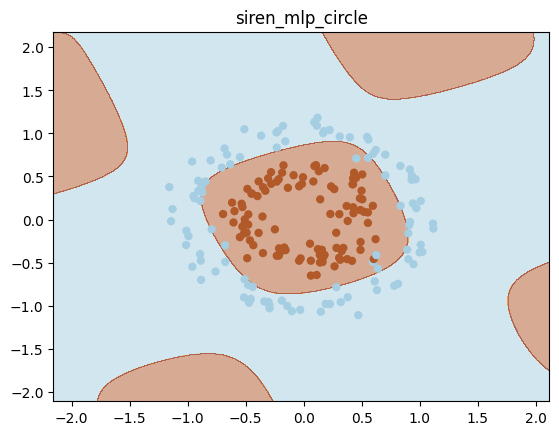

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'siren_mlp_circle'}>)

In [ ]:
plot_decision_boundary(X,y,siren_model_circle,'siren_mlp_circle')